In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json

url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameters = {
  'start':'1',
  'limit':'500',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4bb43acf-36ac-4145-8cea-55ac3b00781e',
}

session = Session()
session.headers.update(headers)

try:
  response = session.get(url, params=parameters)
  data = json.loads(response.text)
  print(data)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  print(e)

{'status': {'timestamp': '2022-06-09T14:20:24.428Z', 'error_code': 0, 'error_message': None, 'elapsed': 113, 'credit_count': 3, 'notice': None, 'total_count': 10039}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

# Normalize the data

In [2]:
import pandas as pd

pd.set_option('display.max_columns', None) #display all the columns in our dataframe
#pd.set_option('display.max_rows', None) #display all rows

In [3]:
df = pd.json_normalize(data['data'])
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906286e+07,1.906286e+07,NaN,1,NaN,NaN,2022-06-09T14:20:00.000Z,30171.929881,2.438950e+10,-41.7154,-0.009342,-1.269756,0.531832,-5.194639,-29.231092,-23.236799,5.751632e+11,46.4624,6.336105e+11,2022-06-09T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211084e+08,1.211084e+08,NaN,2,NaN,NaN,2022-06-09T14:20:00.000Z,1795.731066,1.341015e+10,-40.8201,-0.116401,-0.997076,-0.753160,-25.686692,-44.650365,-31.448339,2.174782e+11,17.5682,2.174782e+11,2022-06-09T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN
2,825,Tether,USDT,tether,34504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.243055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-09T14:20:00.000Z,0.999389,4.632271e+10,-33.0266,-0.005617,0.003852,0.007180,-0.064241,-0.096147,-0.096455,7.238628e+10,5.8464,7.966490e+10,2022-06-09T14:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
3,3408,USD Coin,USDC,usd-coin,4326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.361642e+10,5.361642e+10,NaN,4,NaN,NaN,2022-06-09T14:19:00.000Z,1.000304,3.695374e+09,-35.9899,0.022121,0.001249,0.028551,0.033985,0.041463,0.102682,5.363274e+10,4.3318,5.363274e+10,2022-06-09T14:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-09T14:19:00.000Z,290.087949,8.559120e+08,-41.9642,-0.049841,-0.607892,-3.934655,-10.936004,-31.264281,-22.539582,4.736468e+10,3.8234,4.789838e+10,2022-06-09T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,6841,Phala Network,PHA,phala-network,52,2020-09-13T00:00:00.000Z,"[ai-big-data, privacy, substrate, polkadot, po...",1.000000e+09,2.720000e+08,1.000000e+09,NaN,496,NaN,NaN,2022-06-09T14:20:00.000Z,0.124213,3.637169e+06,-26.8254,-0.318552,-4.898955,-2.786370,-36.925228,-59.234092,-45.473928,3.378601e+07,0.0027,1.242133e+08,2022-06-09T14:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6c5bA91642F10282b576d91922Ae6448C9d52f4E
496,15257,EverRise,RISE,everrise,16,2021-06-21T00:00:00.000Z,"[amm, dex, bnb-chain]",7.161803e+10,6.387913e+10,7.161803e+10,NaN,497,6.033561e+10,3.187960e+07,2022-06-09T14:20:00.000Z,0.000528,4.083193e+04,-66.5726,0.153568,-2.092665,-0.045521,-33.433097,-48.888516,-43.668854,3.375190e+07,0.0000,3.784091e+07,2022-06-09T14:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xC17c30e98541188614dF99239cABD40280810cA3
497,8972,Seedify.fund,SFUND,seedify-fund,27,2021-03-29T00:00:00.000Z,"[gaming, launchpad, polygon-ecosystem, play-to...",1.000000e+08,2.453677e+07,1.000000e+08,NaN,498,1.093331e+07,1.496867e+07,2022-06-09T14:20:00.000Z,1.369089,2.614584e+06,-7.1610,0.019081,-2.007720,-7.319642,-36.327742,-68.552855,-72.213084,3.359302e+07,0.0000,1.369089e+08,2022-06-09T14:20:00.000Z,1839.0,BNB,BNB,bnb,0x477bc8d23c634c154061869478bce96be6045d12
498,3968,Elitium,EUM,elitium,5,2019-05-24T00:00:00.000Z,[],3.322000e+08,2.791538e+07,3.322000e+08,NaN,499,NaN,NaN,2022-06-09T14:19:

# Automate pull process

In [4]:
# create timestamp column to have a date for each pull successfully executed

df['timestamp'] = pd.to_datetime('now')
df.head(5)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.0,1.906286e+07,1.906286e+07,NaN,1,NaN,NaN,2022-06-09T14:20:00.000Z,30171.929881,2.438950e+10,-41.7154,-0.009342,-1.269756,0.531832,-5.194639,-29.231092,-23.236799,5.751632e+11,46.4624,6.336105e+11,2022-06-09T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211084e+08,1.211084e+08,NaN,2,NaN,NaN,2022-06-09T14:20:00.000Z,1795.731066,1.341015e+10,-40.8201,-0.116401,-0.997076,-0.753160,-25.686692,-44.650365,-31.448339,2.174782e+11,17.5682,2.174782e+11,2022-06-09T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562
2,825,Tether,USDT,tether,34504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.243055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-09T14:20:00.000Z,0.999389,4.632271e+10,-33.0266,-0.005617,0.003852,0.007180,-0.064241,-0.096147,-0.096455,7.238628e+10,5.8464,7.966490e+10,2022-06-09T14:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-09 14:20:26.482562
3,3408,USD Coin,USDC,usd-coin,4326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.361642e+10,5.361642e+10,NaN,4,NaN,NaN,2022-06-09T14:19:00.000Z,1.000304,3.695374e+09,-35.9899,0.022121,0.001249,0.028551,0.033985,0.041463,0.102682,5.363274e+10,4.3318,5.363274e+10,2022-06-09T14:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-09 14:20:26.482562
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.0,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-09T14:19:00.000Z,290.087949,8.559120e+08,-41.9642,-0.049841,-0.607892,-3.934655,-10.936004,-31.264281,-22.539582,4.736468e+10,3.8234,4.789838e+10,2022-06-09T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562


In [5]:
#function to automatically pull

def api_runner():
    global df
    url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
    parameters = {
      'start':'1',
      'limit':'500',
      'convert':'USD'
    }
    headers = {
      'Accepts': 'application/json',
      'X-CMC_PRO_API_KEY': '4bb43acf-36ac-4145-8cea-55ac3b00781e',
    }

    session = Session()
    session.headers.update(headers)

    try:
      response = session.get(url, params=parameters)
      data = json.loads(response.text)
      print(data)
    except (ConnectionError, Timeout, TooManyRedirects) as e:
      print(e)
    
    #append result to original dataframe
    df2 = pd.json_normalize(data['data'])
    df2['timestamp'] = pd.to_datetime('now')
    df = df.append(df2)
    

In [6]:
#scrpit to automatically run the function

import os
from time import time
from time import sleep #give us the ability to track the time so that we are able to run through and call the function above in certain intervals

for i in range(333): #333 is the maximum number of times daily that we can run the API as set on the oficial API documentation 
    api_runner()
    print('API runner successfully completed')
    sleep(60) #sleep for 1 minute
exit()

{'status': {'timestamp': '2022-06-09T14:20:25.965Z', 'error_code': 0, 'error_message': None, 'elapsed': 153, 'credit_count': 3, 'notice': None, 'total_count': 10039}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2022-06-09T14:21:26.345Z', 'error_code': 0, 'error_message': None, 'elapsed': 120, 'credit_count': 3, 'notice': None, 'total_count': 10039}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2022-06-09T14:22:26.737Z', 'error_code': 0, 'error_message': None, 'elapsed': 121, 'credit_count': 3, 'notice': None, 'total_count': 10039}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2022-06-09T14:23:27.186Z', 'error_code': 0, 'error_message': None, 'elapsed': 126, 'credit_count': 3, 'notice': None, 'total_count': 10039}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

{'status': {'timestamp': '2022-06-09T14:24:27.713Z', 'error_code': 0, 'error_message': None, 'elapsed': 178, 'credit_count': 3, 'notice': None, 'total_count': 10039}, 'data': [{'id': 1, 'name': 'Bitcoin', 'symbol': 'BTC', 'slug': 'bitcoin', 'num_market_pairs': 9526, 'date_added': '2013-04-28T00:00:00.000Z', 'tags': ['mineable', 'pow', 'sha-256', 'store-of-value', 'state-channel', 'coinbase-ventures-portfolio', 'three-arrows-capital-portfolio', 'polychain-capital-portfolio', 'binance-labs-portfolio', 'blockchain-capital-portfolio', 'boostvc-portfolio', 'cms-holdings-portfolio', 'dcg-portfolio', 'dragonfly-capital-portfolio', 'electric-capital-portfolio', 'fabric-ventures-portfolio', 'framework-ventures-portfolio', 'galaxy-digital-portfolio', 'huobi-capital-portfolio', 'alameda-research-portfolio', 'a16z-portfolio', '1confirmation-portfolio', 'winklevoss-capital-portfolio', 'usv-portfolio', 'placeholder-ventures-portfolio', 'pantera-capital-portfolio', 'multicoin-capital-portfolio', 'par

KeyboardInterrupt: 

In [7]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.906286e+07,1.906286e+07,NaN,1,NaN,NaN,2022-06-09T14:20:00.000Z,30171.929881,2.438950e+10,-41.7154,-0.009342,-1.269756,0.531832,-5.194639,-29.231092,-23.236799,5.751632e+11,46.4624,6.336105e+11,2022-06-09T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.211084e+08,1.211084e+08,NaN,2,NaN,NaN,2022-06-09T14:20:00.000Z,1795.731066,1.341015e+10,-40.8201,-0.116401,-0.997076,-0.753160,-25.686692,-44.650365,-31.448339,2.174782e+11,17.5682,2.174782e+11,2022-06-09T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562
2,825,Tether,USDT,tether,34504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.243055e+10,7.971362e+10,NaN,3,NaN,NaN,2022-06-09T14:20:00.000Z,0.999389,4.632271e+10,-33.0266,-0.005617,0.003852,0.007180,-0.064241,-0.096147,-0.096455,7.238628e+10,5.8464,7.966490e+10,2022-06-09T14:20:00.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-09 14:20:26.482562
3,3408,USD Coin,USDC,usd-coin,4326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,5.361642e+10,5.361642e+10,NaN,4,NaN,NaN,2022-06-09T14:19:00.000Z,1.000304,3.695374e+09,-35.9899,0.022121,0.001249,0.028551,0.033985,0.041463,0.102682,5.363274e+10,4.3318,5.363274e+10,2022-06-09T14:19:00.000Z,1027.0,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-09 14:20:26.482562
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.651168e+08,1.632770e+08,1.632770e+08,NaN,5,NaN,NaN,2022-06-09T14:19:00.000Z,290.087949,8.559120e+08,-41.9642,-0.049841,-0.607892,-3.934655,-10.936004,-31.264281,-22.539582,4.736468e+10,3.8234,4.789838e+10,2022-06-09T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15257,EverRise,RISE,everrise,16,2021-06-21T00:00:00.000Z,"[amm, dex, bnb-chain]",7.161803e+10,6.387913e+10,7.161803e+10,NaN,496,6.033561e+10,3.197423e+07,2022-06-09T14:23:00.000Z,0.000530,4.090419e+04,-66.3718,0.457278,1.583646,0.525051,-33.279280,-48.422930,-43.426493,3.385209e+07,0.0000,3.795324e+07,2022-06-09T14:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0xC17c30e98541188614dF99239cABD40280810cA3,2022-06-09 14:24:28.719452
496,6841,Phala Network,PHA,phala-network,52,2020-09-13T00:00:00.000Z,"[ai-big-data, privacy, substrate, polkadot, po...",1.000000e+09,2.720000e+08,1.000000e+09,NaN,497,NaN,NaN,2022-06-09T14:23:00.000Z,0.124280,3.636219e+06,-26.9657,-0.225945,-4.809676,-2.431491,-36.883303,-59.217257,-45.321158,3.380407e+07,0.0027,1.242797e+08,2022-06-09T14:23:00.000Z,1027.0,Ethereum,ETH,ethereum,0x6c5bA91642F10282b576d91922Ae6448C9d52f4E,2022-06-09 14:24:28.719452
497,8972,Seedify.fund,SFUND,seedify-fund,27,2021-03-29T00:00:00.000Z,"[gaming, launchpad, polygon-ecosystem, play-to...",1.000000e+08,2.453677e+07,1.000000e+08,NaN,498,1.093331e+07,1.495148e+07,2022-06-09T14:23:00.000Z,1.367517,2.616735e+06,-7.3793,-0.139272,-2.107279,-7.444276,-36.438014,-68.604347,-72.279608,3.355445e+07,0.0000,1.367517e+08,2022-06-09T14:23

# Cleaning the data 

In [8]:
#correcting the numbers format for readability
pd.set_option('display.float_format', lambda x: '%.5f' % x)

In [9]:
df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,platform,cmc_rank,self_reported_circulating_supply,self_reported_market_cap,last_updated,quote.USD.price,quote.USD.volume_24h,quote.USD.volume_change_24h,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,timestamp
0,1,Bitcoin,BTC,bitcoin,9526,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",21000000.00000,19062856.00000,19062856.00000,NaN,1,NaN,NaN,2022-06-09T14:20:00.000Z,30171.92988,24389502763.05867,-41.71540,-0.00934,-1.26976,0.53183,-5.19464,-29.23109,-23.23680,575163154555.77087,46.46240,633610527492.38000,2022-06-09T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562
1,1027,Ethereum,ETH,ethereum,5744,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,121108431.49900,121108431.49900,NaN,2,NaN,NaN,2022-06-09T14:20:00.000Z,1795.73107,13410147502.28830,-40.82010,-0.11640,-0.99708,-0.75316,-25.68669,-44.65036,-31.44834,217478172800.59790,17.56820,217478172800.60001,2022-06-09T14:20:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562
2,825,Tether,USDT,tether,34504,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,72430549552.51900,79713622660.05322,NaN,3,NaN,NaN,2022-06-09T14:20:00.000Z,0.99939,46322709201.20143,-33.02660,-0.00562,0.00385,0.00718,-0.06424,-0.09615,-0.09645,72386281472.15372,5.84640,79664903313.37000,2022-06-09T14:20:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7,2022-06-09 14:20:26.482562
3,3408,USD Coin,USDC,usd-coin,4326,2018-10-08T00:00:00.000Z,"[medium-of-exchange, stablecoin, asset-backed-...",NaN,53616417524.99559,53616417524.99559,NaN,4,NaN,NaN,2022-06-09T14:19:00.000Z,1.00030,3695374322.10763,-35.98990,0.02212,0.00125,0.02855,0.03398,0.04146,0.10268,53632738349.69661,4.33180,53632738349.70000,2022-06-09T14:19:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,2022-06-09 14:20:26.482562
4,1839,BNB,BNB,bnb,943,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",165116760.00000,163276974.63000,163276974.63000,NaN,5,NaN,NaN,2022-06-09T14:19:00.000Z,290.08795,855912035.58619,-41.96420,-0.04984,-0.60789,-3.93465,-10.93600,-31.26428,-22.53958,47364682665.73138,3.82340,47898382230.05000,2022-06-09T14:19:00.000Z,NaN,NaN,NaN,NaN,NaN,2022-06-09 14:20:26.482562
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,15257,EverRise,RISE,everrise,16,2021-06-21T00:00:00.000Z,"[amm, dex, bnb-chain]",71618033988.00000,63879133973.43024,71618033988.00000,NaN,496,60335610451.00000,31974231.99736,2022-06-09T14:23:00.000Z,0.00053,40904.18500,-66.37180,0.45728,1.58365,0.52505,-33.27928,-48.42293,-43.42649,33852085.59572,0.00000,37953235.52000,2022-06-09T14:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0xC17c30e98541188614dF99239cABD40280810cA3,2022-06-09 14:24:28.719452
496,6841,Phala Network,PHA,phala-network,52,2020-09-13T00:00:00.000Z,"[ai-big-data, privacy, substrate, polkadot, po...",1000000000.00000,272000000.00000,1000000000.00000,NaN,497,NaN,NaN,2022-06-09T14:23:00.000Z,0.12428,3636218.83914,-26.96570,-0.22594,-4.80968,-2.43149,-36.88330,-59.21726,-45.32116,33804069.63274,0.00270,124279667.77000,2022-06-09T14:23:00.000Z,1027.00000,Ethereum,ETH,ethereum,0x6c5bA91642F10282b576d91922Ae6448C9d52f4E,2022-06-09 14:24:28.719452
497,8972,Seedify.fund,SFUND,seedify-fund,27,2021-03-29T00:00:00.000Z,"[gaming, launchpad, polygon-ecosystem, play-to...",100000000.00000,24536773.70324,100000000.00000,NaN,498,10933308.00000,14951481.24973,2022-06-09T14:2

In [33]:
# percent_change: how much the price of the coin has changed over the time set (hours, past 7 days, 30 days, 60 days)
# group the duplicated values by name and get the average
df2 = df.groupby('name', sort=False)[['quote.USD.percent_change_1h','quote.USD.percent_change_24h','quote.USD.percent_change_7d','quote.USD.percent_change_30d','quote.USD.percent_change_60d','quote.USD.percent_change_90d']].mean()
df2

,quote.USD.percent_change_1h,quote.USD.percent_change_24h,quote.USD.percent_change_7d,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d
name,,,,,,
Bitcoin,0.02016,-1.33164,0.66804,-5.19660,-29.23934,-23.24614
Ethereum,-0.11298,-1.04421,-0.65076,-25.69696,-44.65739,-31.46930
Tether,-0.00544,0.00084,0.00648,-0.06377,-0.09673,-0.09885
USD Coin,0.02904,0.01247,0.02370,0.03799,0.05557,0.09714
BNB,-0.01559,-0.67326,-3.82435,-10.94864,-31.26039,-22.54603
...,...,...,...,...,...,...
EverRise,0.25528,-0.86709,0.14435,-33.38178,-48.73313,-43.58802
Seedify.fund,-0.03809,-2.03596,-7.36592,-36.37251,-68.57317,-72.28494
Elitium,-0.06554,-1.42645,-2.73089,-38.16031,-51.42513,-41.56232


In [35]:
# transforming columns to visualize (pivoting) 
# stack function: will reshape the dataframe by converting the data into a stacked form

df2 = df2.stack()
df2

name                                 
Bitcoin  quote.USD.percent_change_1h      0.02016
         quote.USD.percent_change_24h    -1.33164
         quote.USD.percent_change_7d      0.66804
         quote.USD.percent_change_30d    -5.19660
         quote.USD.percent_change_60d   -29.23934
                                           ...   
IRISnet  quote.USD.percent_change_24h    -0.29279
         quote.USD.percent_change_7d      1.12398
         quote.USD.percent_change_30d   -24.87282
         quote.USD.percent_change_60d   -59.74954
         quote.USD.percent_change_90d   -56.31975
Length: 3006, dtype: float64

In [36]:
#it is a series type, no longer a dataframe

type(df2)

pandas.core.series.Series

In [37]:
# make it again to a dataframe

df3 = df2.to_frame(name='values')
df3

values
name                                          
Bitcoin quote.USD.percent_change_1h    0.02016
        quote.USD.percent_change_24h  -1.33164
        quote.USD.percent_change_7d    0.66804
        quote.USD.percent_change_30d  -5.19660
        quote.USD.percent_change_60d -29.23934
...                                        ...
IRISnet quote.USD.percent_change_24h  -0.29279
        quote.USD.percent_change_7d    1.12398
        quote.USD.percent_change_30d -24.87282
        quote.USD.percent_change_60d -59.74954
        quote.USD.percent_change_90d -56.31975

[3006 rows x 1 columns]

In [38]:
df3.count()

values    3006
dtype: int64

In [39]:
# reset index
index = pd.Index(range(3006))
df4 = df3.reset_index()
df4

,name,level_1,values
0,Bitcoin,quote.USD.percent_change_1h,0.02016
1,Bitcoin,quote.USD.percent_change_24h,-1.33164
2,Bitcoin,quote.USD.percent_change_7d,0.66804
3,Bitcoin,quote.USD.percent_change_30d,-5.19660
4,Bitcoin,quote.USD.percent_change_60d,-29.23934
...,...,...,...
3001,IRISnet,quote.USD.percent_change_24h,-0.29279
3002,IRISnet,quote.USD.percent_change_7d,1.12398
3003,IRISnet,quote.USD.percent_change_30d,-24.87282
3004,IRISnet,quote.USD.percent_change_60d,-59.74954


In [40]:
# rename column level_1
df5 = df4.rename(columns={'level_1': 'percent_change'})
df5

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02016
1,Bitcoin,quote.USD.percent_change_24h,-1.33164
2,Bitcoin,quote.USD.percent_change_7d,0.66804
3,Bitcoin,quote.USD.percent_change_30d,-5.19660
4,Bitcoin,quote.USD.percent_change_60d,-29.23934
...,...,...,...
3001,IRISnet,quote.USD.percent_change_24h,-0.29279
3002,IRISnet,quote.USD.percent_change_7d,1.12398
3003,IRISnet,quote.USD.percent_change_30d,-24.87282
3004,IRISnet,quote.USD.percent_change_60d,-59.74954


In [69]:
#getting the top 10 most popular crytocurrencies based on 'https://time.com/nextadvisor/investing/cryptocurrency/types-of-cryptocurrency/' + Binance USD for personal reason

list = df5.values.tolist() #dataframe to list
most_popular = ['Bitcoin', 'Ethereum', 'XRP', 'Tether', 'Binance USD', 'Cardano', 'Polkadot', 'Stellar', 'USD Coin', 'Dogecoin', 'Chainlink']
for row in list:
    name = row[0]
    if name in most_popular:
        most_popular.append(row)

print(most_popular)

['Bitcoin', 'Ethereum', 'XRP', 'Tether', 'Binance USD', 'Cardano', 'Polkadot', 'Stellar', 'USD Coin', 'Dogecoin', 'Chainlink', ['Bitcoin', 'quote.USD.percent_change_1h', 0.020162446666666667], ['Bitcoin', 'quote.USD.percent_change_24h', -1.331638345], ['Bitcoin', 'quote.USD.percent_change_7d', 0.6680362399999998], ['Bitcoin', 'quote.USD.percent_change_30d', -5.196598168333333], ['Bitcoin', 'quote.USD.percent_change_60d', -29.239340675000005], ['Bitcoin', 'quote.USD.percent_change_90d', -23.246141088333335], ['Ethereum', 'quote.USD.percent_change_1h', -0.11298431000000002], ['Ethereum', 'quote.USD.percent_change_24h', -1.0442090966666668], ['Ethereum', 'quote.USD.percent_change_7d', -0.6507646983333334], ['Ethereum', 'quote.USD.percent_change_30d', -25.696955159999998], ['Ethereum', 'quote.USD.percent_change_60d', -44.65738785], ['Ethereum', 'quote.USD.percent_change_90d', -31.469302183333337], ['Tether', 'quote.USD.percent_change_1h', -0.0054365483333333325], ['Tether', 'quote.USD.perc

In [70]:
headers = most_popular[:11]
headers

['Bitcoin',
 'Ethereum',
 'XRP',
 'Tether',
 'Binance USD',
 'Cardano',
 'Polkadot',
 'Stellar',
 'USD Coin',
 'Dogecoin',
 'Chainlink']

In [71]:
#deleting headers
most_popular = most_popular[11:]
most_popular

[['Bitcoin', 'quote.USD.percent_change_1h', 0.020162446666666667],
 ['Bitcoin', 'quote.USD.percent_change_24h', -1.331638345],
 ['Bitcoin', 'quote.USD.percent_change_7d', 0.6680362399999998],
 ['Bitcoin', 'quote.USD.percent_change_30d', -5.196598168333333],
 ['Bitcoin', 'quote.USD.percent_change_60d', -29.239340675000005],
 ['Bitcoin', 'quote.USD.percent_change_90d', -23.246141088333335],
 ['Ethereum', 'quote.USD.percent_change_1h', -0.11298431000000002],
 ['Ethereum', 'quote.USD.percent_change_24h', -1.0442090966666668],
 ['Ethereum', 'quote.USD.percent_change_7d', -0.6507646983333334],
 ['Ethereum', 'quote.USD.percent_change_30d', -25.696955159999998],
 ['Ethereum', 'quote.USD.percent_change_60d', -44.65738785],
 ['Ethereum', 'quote.USD.percent_change_90d', -31.469302183333337],
 ['Tether', 'quote.USD.percent_change_1h', -0.0054365483333333325],
 ['Tether', 'quote.USD.percent_change_24h', 0.0008433350000000001],
 ['Tether', 'quote.USD.percent_change_7d', 0.006483956666666666],
 ['Tet

In [73]:
#transforming to dataframe

df_final = pd.DataFrame(most_popular)
df_final

,0,1,2
0,Bitcoin,quote.USD.percent_change_1h,0.02016
1,Bitcoin,quote.USD.percent_change_24h,-1.33164
2,Bitcoin,quote.USD.percent_change_7d,0.66804
3,Bitcoin,quote.USD.percent_change_30d,-5.19660
4,Bitcoin,quote.USD.percent_change_60d,-29.23934
...,...,...,...
61,Stellar,quote.USD.percent_change_24h,-1.36433
62,Stellar,quote.USD.percent_change_7d,1.05924
63,Stellar,quote.USD.percent_change_30d,-8.27064
64,Stellar,quote.USD.percent_change_60d,-31.33548


In [74]:
#change column names
df_final.columns = ['name', 'percent_change', 'values']
df_final

,name,percent_change,values
0,Bitcoin,quote.USD.percent_change_1h,0.02016
1,Bitcoin,quote.USD.percent_change_24h,-1.33164
2,Bitcoin,quote.USD.percent_change_7d,0.66804
3,Bitcoin,quote.USD.percent_change_30d,-5.19660
4,Bitcoin,quote.USD.percent_change_60d,-29.23934
...,...,...,...
61,Stellar,quote.USD.percent_change_24h,-1.36433
62,Stellar,quote.USD.percent_change_7d,1.05924
63,Stellar,quote.USD.percent_change_30d,-8.27064
64,Stellar,quote.USD.percent_change_60d,-31.33548


In [82]:
#change names to fit into visualization
df_final['percent_change'].replace(['quote.USD.percent_change_1h', 'quote.USD.percent_change_24h', 'quote.USD.percent_change_7d', 'quote.USD.percent_change_30d', 'quote.USD.percent_change_60d', 'quote.USD.percent_change_90d'], ['1h', '24h', '7d', '30d', '60d', '90d'], inplace = True)
df_final

,name,percent_change,values
0,Bitcoin,1h,0.02016
1,Bitcoin,24h,-1.33164
2,Bitcoin,7d,0.66804
3,Bitcoin,30d,-5.19660
4,Bitcoin,60d,-29.23934
...,...,...,...
61,Stellar,24h,-1.36433
62,Stellar,7d,1.05924
63,Stellar,30d,-8.27064
64,Stellar,60d,-31.33548


# Data Visualization

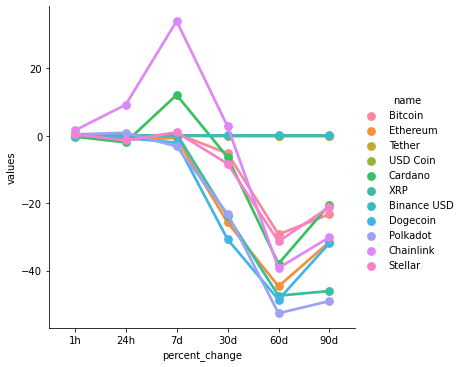

In [83]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x = 'percent_change', y = 'values', hue = 'name', data = df_final, kind = 'point')

All of them within 1 hour change are pretty stable. One interesting thing to mention about this data is that all cryptocurrencies were doing fine until 7 days, with Chainlink and Cardano showing an even better result. However, until the 90 days period, a lot of them have gone down (possibily due to the recent big crash in the crypto industry).

In [87]:
df_1 = df[['name', 'quote.USD.price', 'timestamp']]
# Lets look at Bitcoin
df_1 = df_1.query("name=='Bitcoin'")
df_1

,name,quote.USD.price,timestamp
0,Bitcoin,30171.92988,2022-06-09 14:20:26.482562
0,Bitcoin,30171.92988,2022-06-09 14:20:26.932078
0,Bitcoin,30171.97412,2022-06-09 14:21:27.314372
0,Bitcoin,30170.03365,2022-06-09 14:22:27.743196
0,Bitcoin,30170.96979,2022-06-09 14:23:28.236251
0,Bitcoin,30178.05839,2022-06-09 14:24:28.719452


<AxesSubplot:xlabel='timestamp', ylabel='quote.USD.price'>

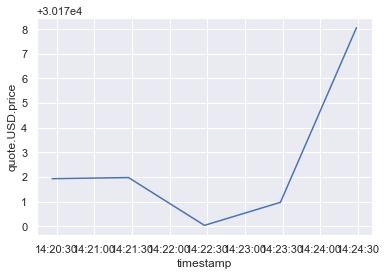

In [89]:
sns.set_theme(style='darkgrid')
sns.lineplot(x='timestamp', y='quote.USD.price', data= df_1)

We are looking at a very short time series (60 seconds sleep interval), but we can track the data and use it to show the changes over days, weeks or even months.

# Many more to come...